# Simple Network with Single Stage and Error 

This example contains a simple single stage neural network with 6 inputs and 12 outputs. It is based on a simple example found on the internet for detecting brail characters. The purpose of this example is to show the error updates for a single network stage. A single stage is not capable of handling this example well. 



## Hardware Details

The hardware block for this structure is simple and consists of 3 main units. 

1. Memory Unit  : Containing separate memories for the data/tap and bias
1. Neural Stage : Containing a set of neurons which are shared for the calculation
1. Error Stage  : Containing a calculation of the expected data vs input data


## Code Generator Details

The code used for this example is contained in the following locations : 

1. [Test Generator](https://github.com/andywag/NeuralHDL/blob/master/src/test/scala/com/simplifide/generate/neural/SimpleNetworkTest.scala)
1. [Block Generator](https://github.com/andywag/NeuralHDL/blob/master/src/main/scala/com/simplifide/generate/blocks/neural/simple/NeuralNetwork.scala)
1. [Generated Code and Test Results](https://github.com/andywag/NeuralHDL/tree/master/tests/simple)


In [17]:
#%reload_ext mermaid

In [18]:
## Test Results

In [19]:
import sys
sys.path.append("../python") # go to parent dir

import numpy as numpy
import matplotlib.pyplot as plt
import utils.FloatUtil as fu

def show_results(base,outputs) : 
    input   = fu.load_float_file(base + "rtl_in.hex")
    error   = fu.load_float_file(base + "rtl_error.hex")
    bias    = fu.load_float_file(base + "rtl_bias.hex")
    output  = fu.load_float_file(base + "rtl_out.hex")
    pre  = fu.load_float_file(base + "rtl_pre.hex")
    
    tresult = numpy.array(error)
    size    = int(len(tresult)/6)
    shift  = numpy.square(numpy.reshape(tresult,(size,6)))
    vshift = numpy.sum(shift,1)

    plt.figure(figsize=(8,6))

    plt.figure(figsize=(8,6))

    plt.subplot(221)
    plt.plot(vshift)
    plt.ylabel('mse')
    plt.xlabel('time')
    plt.title('Squared Error vs Time')

    plt.subplot(222)
    plt.plot(output)
    plt.ylabel('output')
    plt.xlabel('time')
    plt.title('Output vs Time')

    plt.subplot(223)
    plt.plot(tresult)
    plt.ylabel('error')
    plt.xlabel('time')
    plt.title('Error vs Time')

    plt.subplot(224)
    plt.plot(bias[0:len(bias):outputs])
    plt.ylabel('bias')
    plt.xlabel('time')
    plt.title('Neuron Bias vs Time')
    plt.show()


### Identity Matrix Test Results

This very simple network will not properly converge for this example. For that reason the network was tested with an identity matrix (input = output) to prove the convergence of the taps and bias for this case. The results of the test are shown below with a relatively quick convergence and small steady state error. 

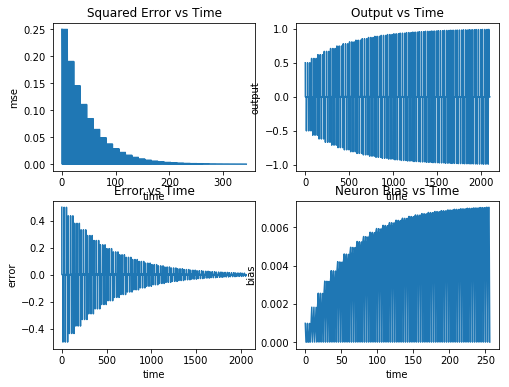

In [20]:
show_results("/home/andy/projects/NeuralHDL/tests/simple/data/",8)

### Test results with full test Case

This test uses an input which was found from an example on the internet shown below. 

http://neuroph.sourceforge.net/tutorials/Braille/RecognitionOfBrailleAlphabetUsingNeuralNetworks.html

The case converges as shown below but does not track to a usable level. 

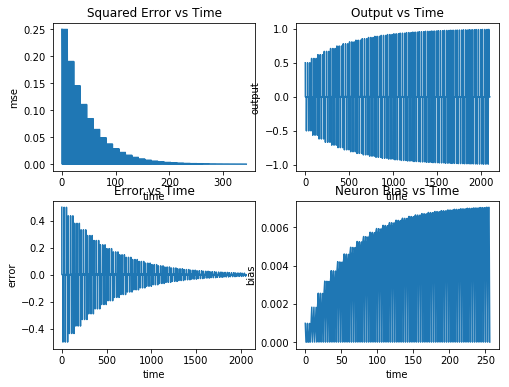

In [21]:
show_results("/home/andy/projects/NeuralHDL/tests/simple/data/",8)